## Ensemble Techniques

### Bagging

#### BaggingClassifier

In [10]:
#Necessary Imports 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [11]:
from  sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 4)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.8951048951048951

Let's use bagging over KNN classifier and see if our score improve

In [14]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=9,max_samples=0.7,
                           bootstrap=True,random_state=3,oob_score=True)

In [15]:
bag_knn.fit(x_train, y_train)

bag_knn.score(x_test, y_test)

0.9020979020979021

Great! our score significantly improves with use of bagging.

let's not use bootstrap and see the model accuracy! Remember this is a "Pasting"

In [16]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=9,max_samples=0.7,
                           bootstrap=False,random_state=3)

In [17]:
pasting_knn.fit(x_train, y_train)

pasting_knn.score(x_test, y_test)

0.8881118881118881

### Random Forests

In [1]:
#Necessary Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing, Normalizing
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv('cardio_train1.csv')

In [20]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [21]:
df.shape

(69301, 13)

In [22]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Observations
#1 No Missing values
#2 Assuming Age is in number of days
#3 Outliers inn height
#4 Outliers in systolic blood pressure - ap_high
#5 Outliers in ap_low
#6 Seems Cholestrol and glucose are binary, will see in the further analysis

#### How to remove duplicates

In [23]:
# Drop ID and remove duplicate
df.drop('id',axis=1,inplace = True)

# Duplicate removal
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(69277, 12)

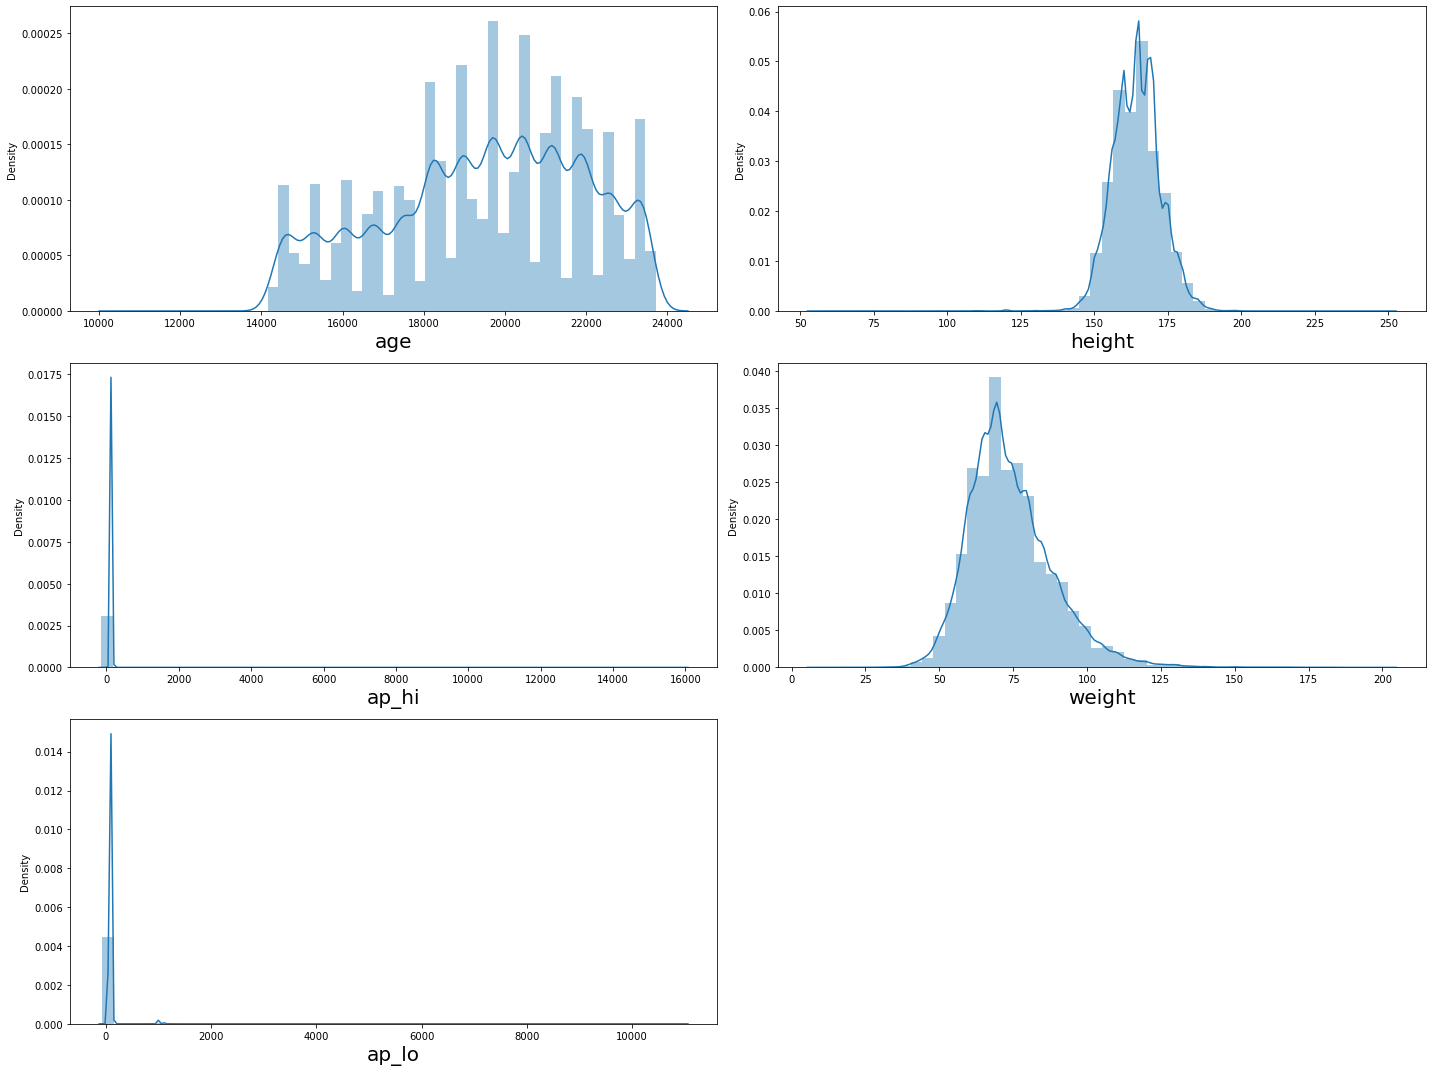

In [25]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### How it works

### Z distribution/statistics

z= (x-mean)/std

In [26]:
# with std 3 let see the stats
# from scipy import stats
# Zscore = (x-mean)/std    => you have seen this in standard scaler

from scipy.stats import zscore

z_score = zscore(df[['age', 'height','ap_hi','weight','ap_lo']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_energy =(abs_z_score < 3).all(axis=1)

df = df[filtering_energy]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


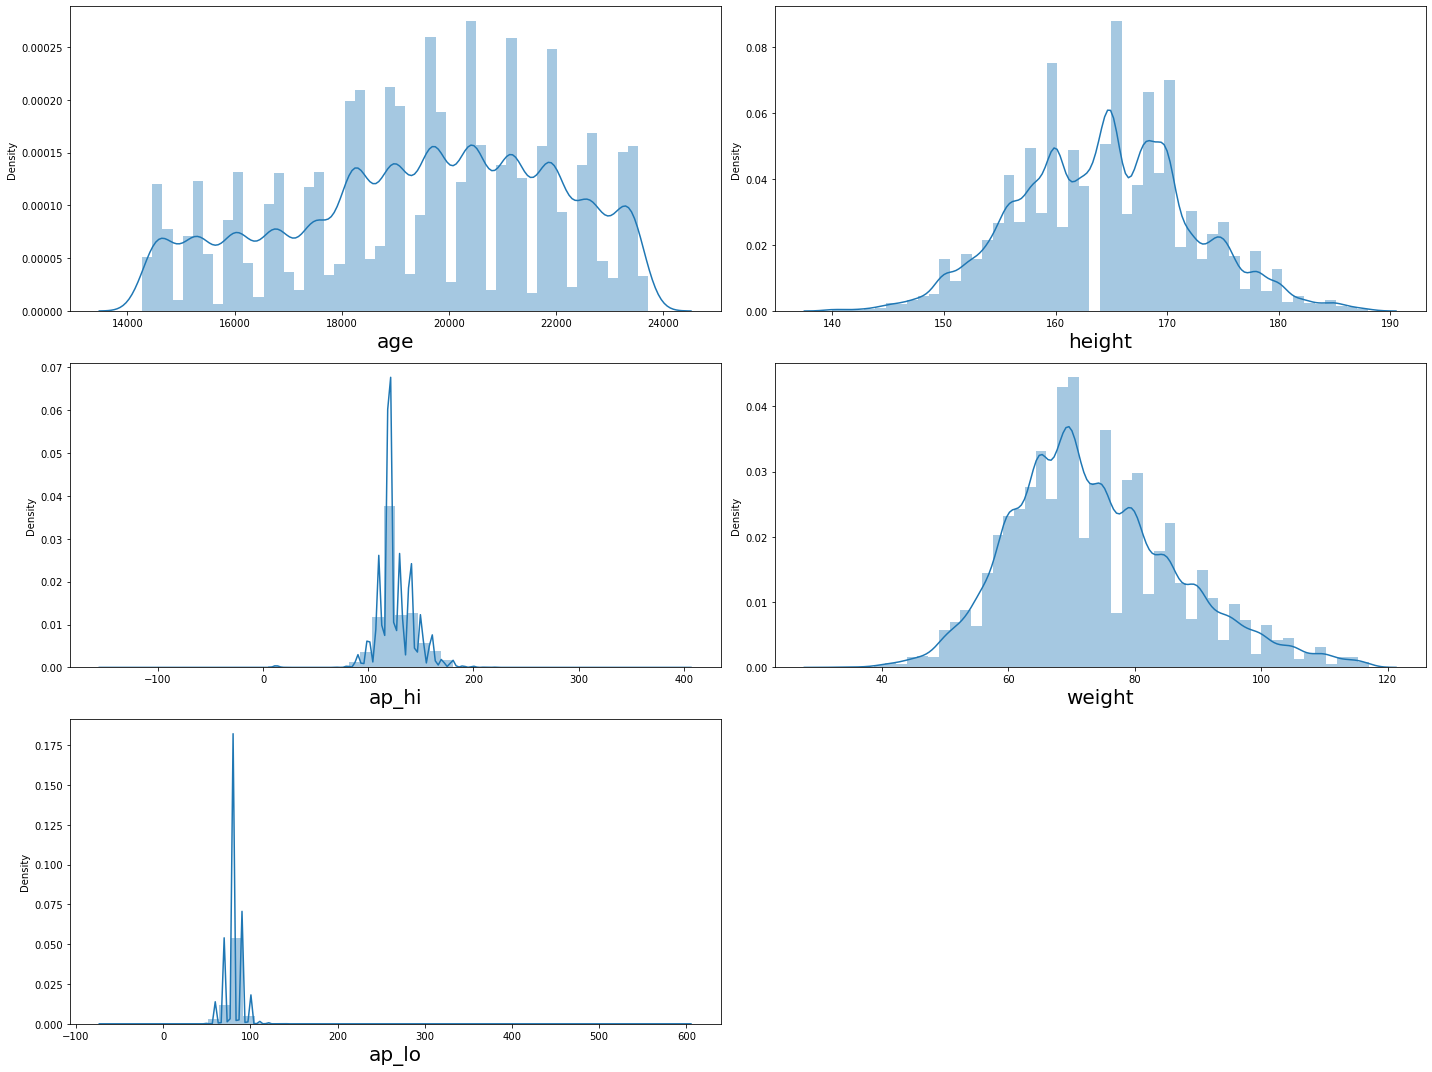

In [28]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [29]:
df.shape

(67360, 12)

####  1-  You can use corelation matrix and plot heatmat to check for multicollinearity or corelation b/w all variables (refer decision tree algo for heat map)

#### or

#### 2- you can use VIF to check if there is any multicollinearity(Refer Logistic Regression for VIF)

In [30]:
# Cannot make out much from the above plots, Let's build model
x= df.drop(columns = ['cardio'], axis =1)
y= df['cardio']

#### Split into train test data set

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 41)

### Model Confidence/accuracy

In [33]:
# write one function and call as many as times to check accuracy_score of different models
def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===================Train Result============================")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred) * 100:.2f}%")
    
    elif train == False:
        pred = clf.predict(x_test)
        
        print("\n===================Test Result============================")
        
        print(f"Accuracy Score:{accuracy_score(y_test, pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits = 2))  

In [34]:
# initiate DecisionTreeClassifier with new parameters and train
random_clf = RandomForestClassifier()

# train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
# Call the function and pass dataset to check train and test score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = True)   # this is for Training Score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = False)   # this is for Test Score


===================Train Result============================
Accuracy Score:99.99%

===================Test Result============================
Accuracy Score:71.26%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10243
           1       0.71      0.69      0.70      9965

    accuracy                           0.71     20208
   macro avg       0.71      0.71      0.71     20208
weighted avg       0.71      0.71      0.71     20208



### Let's Tune the parameters using GridSearchCV

In [38]:
# RandomForestClassifier
params = {'n_estimators' : [13,15],
         'criterion' : ['entropy','gini'],
         'max_depth' : [10,15],
         'min_samples_split' : [10,11],
         'min_samples_leaf' : [5,6]
         } 
grd = GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train, y_train)

print('best_params = >', grd.best_params_)

best_params = > {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}


In [39]:
random_clf = grd.best_estimator_  # reinstantiating with best params

random_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=13)

In [40]:
# Call the function and pass dataset to check train and test score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = True)   # this is for Training Score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = False)   # this is for Test Score


===================Train Result============================
Accuracy Score:74.86%

===================Test Result============================
Accuracy Score:73.29%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75     10243
           1       0.76      0.68      0.71      9965

    accuracy                           0.73     20208
   macro avg       0.74      0.73      0.73     20208
weighted avg       0.73      0.73      0.73     20208



### Note 

#### You can improve the performance by tweaking preprocessing methods

## Let's plot ROC AUC curveto choose best model

In [4]:
# Plot ROC/AUC for multiple models without hyperparams tuning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [5]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [8]:
# Train test split
x = df.drop(columns=['cardio'], axis =1)
y = df['cardio']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 41)

#Training with all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
kn.fit(x_train, y_train)
dt.fit(x_train, y_train)

print("All models are trained")

All models are trained


In [9]:
# All models score captured
lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)

print("All models test score captured")

Allmodels test score captured


### Let's check ROC AUC  Curve for the fitted model

#### -True Positive Rate (TPR) = Out of 100 actual cardio patients how many our model predicted as cardio patient corectly.(Higher the better)

#### - False  Positive Rate (FPR) = How many people were predicted as cardio patients but in reality they were healthy.(Lower the better)

Since it is difficult to evaluate the score based on only TPR and FPR data. There comes AUC

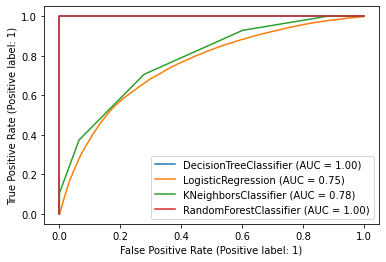

In [11]:
## How well our model works on Training data
disp = plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train, ax=disp.ax_)  # ax_  =  Axes with confusion matrix

plot_roc_curve(kn,x_train,y_train, ax=disp.ax_)

plot_roc_curve(rf,x_train,y_train, ax=disp.ax_)

plt.legend(prop = {'size' : 10}, loc = 'lower right')

plt.show()

#### How well our model works on Test data

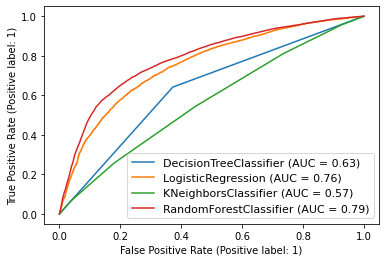

In [12]:
disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)  # ax_  =  Axes with confusion matrix

plot_roc_curve(kn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)

plt.legend(prop = {'size' : 11}, loc = 'lower right')

plt.show()